# STOCK PICKING - UNDERSTANDING THE PAST

Let's approach the problem of stock-picking asking: _which stock would you pick if you know the future and you can
open 1 position only (short/long) for a fixed time-window and with a fixed amount of money?_ 

The answer is the

* open a long position on the security with the highest cumulative return, if the absolute value of such positive cumulative return is higher than the absolute value of the cumulative return of the security with the lowest cumulative return
* open a short position on the security with the lowest cumulative return, otherwise 

It would be very easy and for this reason God decided to prevent us from predicting correctly the future. 
Key questions are: 

* how extrapolable is the past? how much can be inferred from the past with confidence? 
* how much are we able to detect securities for which is more difficult to predict the future? 

For the second questions, an index like sharpe ratio was born, but how good would be a strategy for stock picking based on sharpe ratio? 


Let's assume as __universe the top 1500 “tradeable” stocks by 200-day average dollar volume__, capped at 30% of equities allocated to any single sector. A stock is considered “tradeable” if it meets the following criteria:

* the stock must be the primary share class for its company.
* the company issuing the stock must have known market capitalization.
* the stock must not be a depository receipt.
* the stock must not be traded over the counter (OTC).
* the stock must not be for a limited partnership.
* the stock must have a known previous-day close price.
* the stock must have had nonzero volume on the previous trading day

In [1]:
from quantopian.interactive.data.sentdex import sentiment 
from quantopian.pipeline.filters.morningstar import Q1500US
from quantopian.pipeline import Pipeline 
from quantopian.research import run_pipeline
import matplotlib.pyplot as plt 
import datetime 
import numpy as np
import pandas as pd

In [2]:
def fill_missing_values(df_data):
    """Fill missing values in data frame, in place."""
    df_data.fillna(method='ffill',inplace=True)
    df_data.fillna(method='backfill',inplace=True)
    return df_data

# WEEK - Let's see performace in the past week 

In [3]:
DELTA = 7 

In [4]:
start_date = (datetime.date.today() - datetime.timedelta(DELTA)).strftime("%m-%d-%Y")
print("start_date",start_date)

('start_date', '04-08-2017')


In [5]:
end_date = (datetime.date.today()).strftime("%m-%d-%Y")
print("end_date",end_date)

('end_date', '04-15-2017')


In [6]:
def make_pipeline():
    universe = (Q1500US())
    pipe = Pipeline( screen = universe)
    return pipe

result = run_pipeline(pipeline=make_pipeline(),start_date=start_date,end_date=end_date)
result.head()

Empty DataFrame
Columns: []
Index: [(2017-04-10 00:00:00+00:00, Equity(24 [AAPL])), (2017-04-10 00:00:00+00:00, Equity(52 [ABM])), (2017-04-10 00:00:00+00:00, Equity(53 [ABMD])), (2017-04-10 00:00:00+00:00, Equity(62 [ABT])), (2017-04-10 00:00:00+00:00, Equity(67 [ADSK]))]

In [7]:
assets = result.index.levels[1].unique()
print("# assets:",len(assets))

('# assets:', 1500)


In [8]:
pricing = fill_missing_values(get_pricing(assets,start_date=start_date,end_date=end_date,fields='open_price'))

In [9]:
pricing.head()

,Equity(24 [AAPL]),Equity(52 [ABM]),Equity(53 [ABMD]),Equity(62 [ABT]),Equity(67 [ADSK]),Equity(76 [TAP]),Equity(114 [ADBE]),Equity(122 [ADI]),Equity(128 [ADM]),Equity(161 [AEP]),...,Equity(49760 [WBT]),Equity(49881 [LSXM_A]),Equity(49891 [MGP]),Equity(50138 [PI]),Equity(50181 [FHB]),Equity(50288 [TTD]),Equity(50357 [ARCH]),Equity(50533 [CNDT]),Equity(50535 [PK]),Equity(50595 [BIVV])
2017-04-10 00:00:00+00:00,143.60,41.88,125.40,43.564,84.91,95.26,130.32,80.00,44.91,67.47,...,19.32,39.52,27.93,29.67,29.25,37.11,74.73,16.379,26.25,56.95
2017-04-11 00:00:00+00:00,142.94,41.79,124.89,43.220,85.35,95.77,129.91,78.94,44.93,67.39,...,19.31,39.20,27.85,30.50,28.91,36.80,76.00,16.300,26.45,56.09
2017-04-12 00:00:00+00:00,141.60,42.32,125.87,43.320,85.87,95.53,129.96,78.27,44.64,67.15,...,19.10,38.96,27.94,31.11,29.13,37.69,73.10,16.079,26.37,56.95
2017-04-13 00:00:00+00:00,141.91,42.37,125.16,42.400,85.20,95.50,129.63,76.87,44.55,67.80,...,18.98,38.87,27.89,31.40,28.70,36.98,71.50,15.940,26.47,56.49


In [10]:
type(pricing)

<class 'pandas.core.frame.DataFrame'>

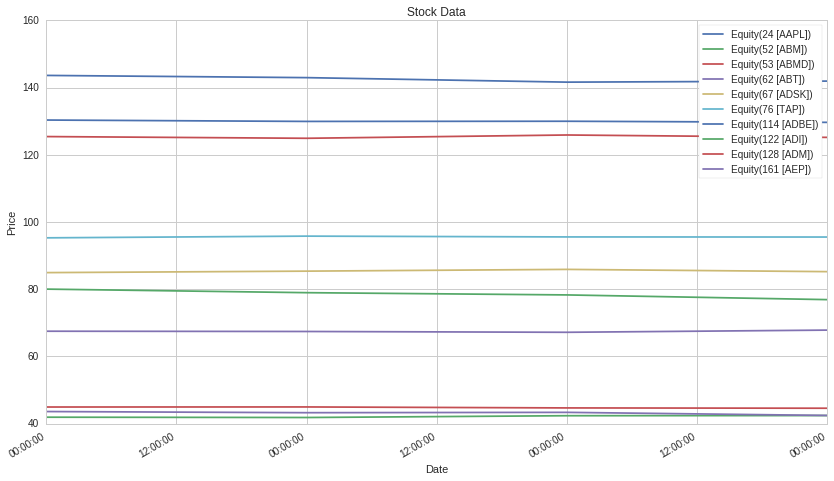

In [11]:
pricing = pricing.sort_index()
ax = pricing.ix[:,0:10].plot(title="Stock Data")
ax.set_xlabel("Date")
ax.set_ylabel("Price")
plt.show()

## Daily Returns

In [12]:
def compute_daily_returns(df):
    """Compute and return the daily return values."""
    # Note: Returned DataFrame must have the same number of rows
    daily_returns = (df / df.shift(1)) - 1 
    daily_returns.ix[0,:] = 0 
    return daily_returns

In [13]:
dayly_returns = compute_daily_returns(pricing)
dayly_returns = dayly_returns.sort_index()
dayly_returns.head()

,Equity(24 [AAPL]),Equity(52 [ABM]),Equity(53 [ABMD]),Equity(62 [ABT]),Equity(67 [ADSK]),Equity(76 [TAP]),Equity(114 [ADBE]),Equity(122 [ADI]),Equity(128 [ADM]),Equity(161 [AEP]),...,Equity(49760 [WBT]),Equity(49881 [LSXM_A]),Equity(49891 [MGP]),Equity(50138 [PI]),Equity(50181 [FHB]),Equity(50288 [TTD]),Equity(50357 [ARCH]),Equity(50533 [CNDT]),Equity(50535 [PK]),Equity(50595 [BIVV])
2017-04-10 00:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-04-11 00:00:00+00:00,-0.004596,-0.002149,-0.004067,-0.007896,0.005182,0.005354,-0.003146,-0.013250,0.000445,-0.001186,...,-0.000518,-0.008097,-0.002864,0.027974,-0.011624,-0.008354,0.016995,-0.004823,0.007619,-0.015101
2017-04-12 00:00:00+00:00,-0.009375,0.012682,0.007847,0.002314,0.006093,-0.002506,0.000385,-0.008487,-0.006454,-0.003561,...,-0.010875,-0.006122,0.003232,0.020000,0.007610,0.024185,-0.038158,-0.013558,-0.003025,0.015333
2017-04-13 00:00:00+00:00,0.002189,0.001181,-0.005641,-0.021237,-0.007802,-0.000314,-0.002539,-0.017887,-0.002016,0.009680,...,-0.006283,-0.002310,-0.001790,0.009322,-0.014761,-0.018838,-0.021888,-0.008645,0.003792,-0.008077


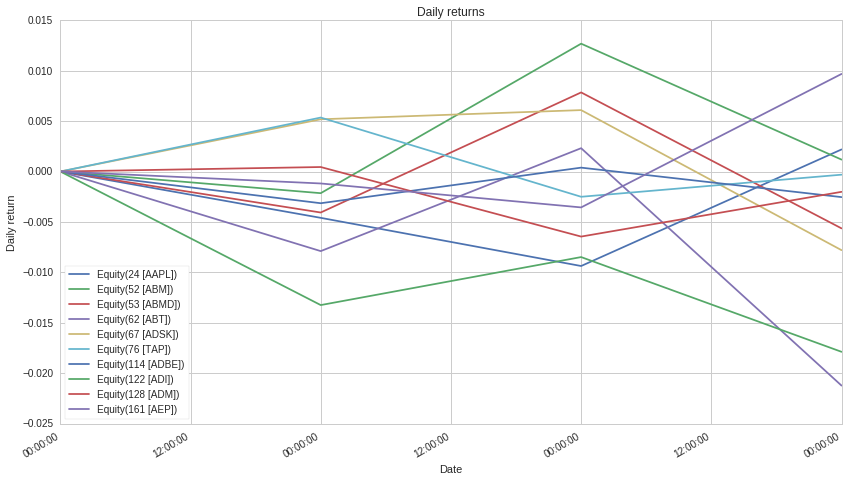

In [14]:
ax = dayly_returns.ix[:,0:10].plot(title="Daily returns")
ax.set_xlabel("Date")
ax.set_ylabel("Daily return")
plt.show()

__Top performance by day and related symbols__

In [15]:
dayly_returns.max(axis=1)

2017-04-10 00:00:00+00:00    0.000000
2017-04-11 00:00:00+00:00    0.148936
2017-04-12 00:00:00+00:00    0.276228
2017-04-13 00:00:00+00:00    0.185775
Freq: C, dtype: float64

In [16]:
dayly_returns.idxmax(axis=1)

2017-04-10 00:00:00+00:00       Equity(24 [AAPL])
2017-04-11 00:00:00+00:00    Equity(27817 [SPWR])
2017-04-12 00:00:00+00:00    Equity(14972 [NBIX])
2017-04-13 00:00:00+00:00    Equity(45503 [AAOI])
Freq: C, dtype: object

In [17]:
dayly_returns.ix[:,0:4]

,Equity(24 [AAPL]),Equity(52 [ABM]),Equity(53 [ABMD]),Equity(62 [ABT])
2017-04-10 00:00:00+00:00,0.000000,0.000000,0.000000,0.000000
2017-04-11 00:00:00+00:00,-0.004596,-0.002149,-0.004067,-0.007896
2017-04-12 00:00:00+00:00,-0.009375,0.012682,0.007847,0.002314
2017-04-13 00:00:00+00:00,0.002189,0.001181,-0.005641,-0.021237


In [18]:
dayly_returns[dayly_returns.columns[0]]

2017-04-10 00:00:00+00:00    0.000000
2017-04-11 00:00:00+00:00   -0.004596
2017-04-12 00:00:00+00:00   -0.009375
2017-04-13 00:00:00+00:00    0.002189
Freq: C, Name: Equity(24 [AAPL]), dtype: float64

In [19]:
dayly_returns[dayly_returns.idxmax(axis=1)[1]]

2017-04-10 00:00:00+00:00    0.000000
2017-04-11 00:00:00+00:00    0.148936
2017-04-12 00:00:00+00:00   -0.052707
2017-04-13 00:00:00+00:00    0.004511
Freq: C, Name: Equity(27817 [SPWR]), dtype: float64

__average__ / __std__

In [20]:
dayly_returns.mean(axis=1)

2017-04-10 00:00:00+00:00    0.000000
2017-04-11 00:00:00+00:00    0.001072
2017-04-12 00:00:00+00:00    0.003800
2017-04-13 00:00:00+00:00   -0.009259
Freq: C, dtype: float64

In [21]:
dayly_returns.std(axis=1)

2017-04-10 00:00:00+00:00    0.00000
2017-04-11 00:00:00+00:00    0.01473
2017-04-12 00:00:00+00:00    0.01479
2017-04-13 00:00:00+00:00    0.01524
Freq: C, dtype: float64

## Cumulative returns

In [22]:
def cumulative_returns(df):
    return df/df.ix[0,:] - 1 

In [23]:
cr = cumulative_returns(pricing)
cr = cr.sort_index()
cr.head()

,Equity(24 [AAPL]),Equity(52 [ABM]),Equity(53 [ABMD]),Equity(62 [ABT]),Equity(67 [ADSK]),Equity(76 [TAP]),Equity(114 [ADBE]),Equity(122 [ADI]),Equity(128 [ADM]),Equity(161 [AEP]),...,Equity(49760 [WBT]),Equity(49881 [LSXM_A]),Equity(49891 [MGP]),Equity(50138 [PI]),Equity(50181 [FHB]),Equity(50288 [TTD]),Equity(50357 [ARCH]),Equity(50533 [CNDT]),Equity(50535 [PK]),Equity(50595 [BIVV])
2017-04-10 00:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-04-11 00:00:00+00:00,-0.004596,-0.002149,-0.004067,-0.007896,0.005182,0.005354,-0.003146,-0.013250,0.000445,-0.001186,...,-0.000518,-0.008097,-0.002864,0.027974,-0.011624,-0.008354,0.016995,-0.004823,0.007619,-0.015101
2017-04-12 00:00:00+00:00,-0.013928,0.010506,0.003748,-0.005601,0.011306,0.002834,-0.002762,-0.021625,-0.006012,-0.004743,...,-0.011387,-0.014170,0.000358,0.048534,-0.004103,0.015629,-0.021812,-0.018316,0.004571,0.000000
2017-04-13 00:00:00+00:00,-0.011769,0.011700,-0.001914,-0.026719,0.003415,0.002519,-0.005295,-0.039125,-0.008016,0.004891,...,-0.017598,-0.016447,-0.001432,0.058308,-0.018803,-0.003503,-0.043222,-0.026803,0.008381,-0.008077


In [24]:
cr.max(axis=1)

2017-04-10 00:00:00+00:00    0.000000
2017-04-11 00:00:00+00:00    0.148936
2017-04-12 00:00:00+00:00    0.264677
2017-04-13 00:00:00+00:00    0.264677
Freq: C, dtype: float64

In [25]:
cr.idxmax(axis=1)

2017-04-10 00:00:00+00:00       Equity(24 [AAPL])
2017-04-11 00:00:00+00:00    Equity(27817 [SPWR])
2017-04-12 00:00:00+00:00    Equity(14972 [NBIX])
2017-04-13 00:00:00+00:00    Equity(14972 [NBIX])
Freq: C, dtype: object

__Best performance__

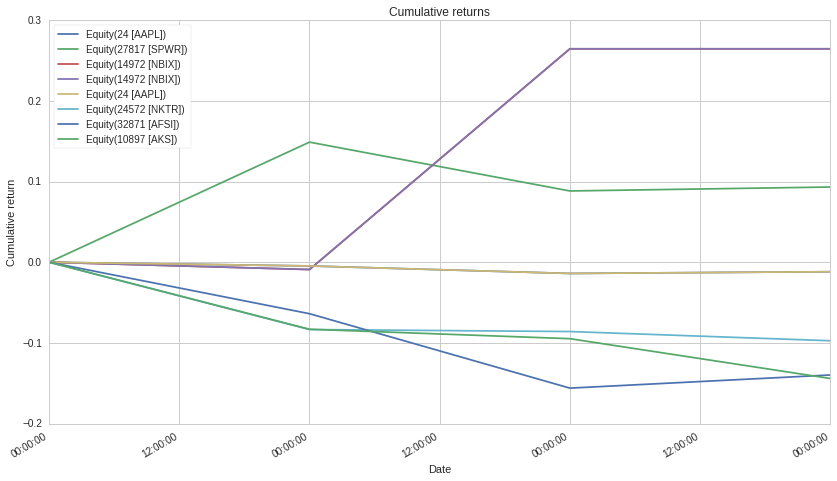

In [26]:
ax = cr[pd.concat([cr.idxmax(axis=1),cr.idxmin(axis=1)])].plot(title="Cumulative returns")
ax.set_xlabel("Date")
ax.set_ylabel("Cumulative return")
plt.show()

## Sharpe Ratio

In [28]:
def sharpe_ratio(df,sample_freq='d',risk_free_rate=0.0):
    
    sr = (df - risk_free_rate).mean() / df.std()
    
    if sample_freq == 'd':
        sr = sr * np.sqrt(252)
    elif sample_freq == 'w':
        sr = sr * np.sqrt(52)
    elif sample_freq == 'm':
        sr = sr * np.sqrt(12)
    else:
        raise Exception('unkown sample frequency :'+str(sample_freq))
        
    sr = sr.replace(np.inf, np.nan)
        
    return sr

In [32]:
sr = sharpe_ratio(compute_daily_returns(pricing))
sr.head()

Equity(24 [AAPL])    -9.105670
Equity(52 [ABM])      6.994437
Equity(53 [ABMD])    -1.224784
Equity(62 [ABT])    -10.014340
Equity(67 [ADSK])     2.162191
dtype: float64

In [33]:
sr = sr.sort_values(ascending=False)
sr.head()

Equity(5767 [PAYX])     23.718533
Equity(17702 [NLY])     23.303703
Equity(2293 [DRE])      23.242465
Equity(3846 [DIN])      23.098774
Equity(21413 [LXRX])    23.090821
dtype: float64

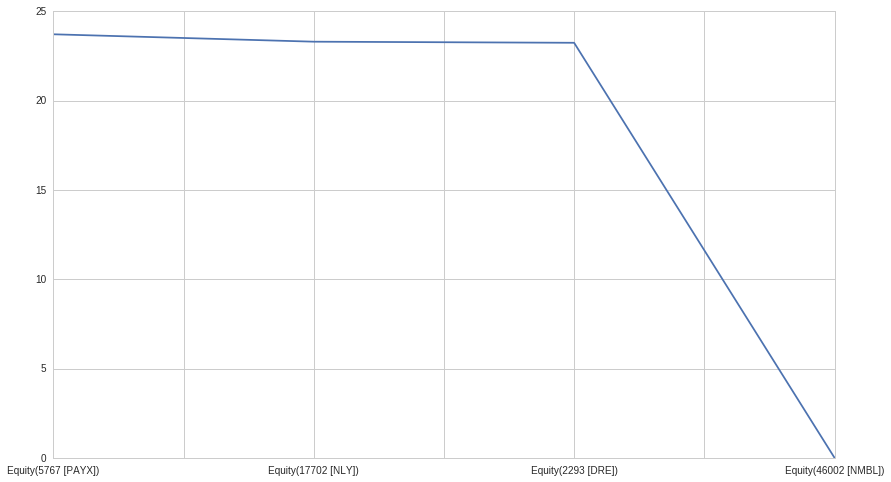

In [34]:
pd.concat([sr.head(3),sr.fillna(0).tail(1)]).plot()

# MONTH - Let's see performace in the past month 

In [35]:
DELTA = 30

In [36]:
start_date = (datetime.date.today() - datetime.timedelta(DELTA)).strftime("%m-%d-%Y")
print("start_date",start_date)

('start_date', '03-16-2017')


In [37]:
end_date = (datetime.date.today()).strftime("%m-%d-%Y")
print("end_date",end_date)

('end_date', '04-15-2017')


In [38]:
def make_pipeline():
    universe = (Q1500US())
    pipe = Pipeline( screen = universe)
    return pipe

result = run_pipeline(pipeline=make_pipeline(),start_date=start_date,end_date=end_date)
result.head()

Empty DataFrame
Columns: []
Index: [(2017-03-16 00:00:00+00:00, Equity(24 [AAPL])), (2017-03-16 00:00:00+00:00, Equity(52 [ABM])), (2017-03-16 00:00:00+00:00, Equity(53 [ABMD])), (2017-03-16 00:00:00+00:00, Equity(62 [ABT])), (2017-03-16 00:00:00+00:00, Equity(67 [ADSK]))]

In [39]:
assets = result.index.levels[1].unique()
print("# assets:",len(assets))

('# assets:', 1522)


In [40]:
pricing = fill_missing_values(get_pricing(assets,start_date=start_date,end_date=end_date,fields='open_price'))

In [41]:
pricing.head()

,Equity(24 [AAPL]),Equity(52 [ABM]),Equity(53 [ABMD]),Equity(62 [ABT]),Equity(67 [ADSK]),Equity(76 [TAP]),Equity(114 [ADBE]),Equity(122 [ADI]),Equity(128 [ADM]),Equity(161 [AEP]),...,Equity(49760 [WBT]),Equity(49881 [LSXM_A]),Equity(49891 [MGP]),Equity(50138 [PI]),Equity(50181 [FHB]),Equity(50288 [TTD]),Equity(50357 [ARCH]),Equity(50533 [CNDT]),Equity(50535 [PK]),Equity(50595 [BIVV])
2017-03-16 00:00:00+00:00,140.720,44.222,123.00,44.895,88.60,97.98,123.250,83.29,45.07,66.47,...,19.50,39.14,25.514,28.61,31.38,41.84,68.35,16.050,26.133,50.66
2017-03-17 00:00:00+00:00,141.000,44.441,123.17,44.826,87.13,98.75,128.449,83.31,44.91,66.16,...,19.20,39.21,25.514,28.83,31.27,40.06,68.54,15.820,26.104,50.57
2017-03-20 00:00:00+00:00,140.400,44.302,123.97,44.915,86.29,98.60,126.990,83.26,44.60,66.62,...,19.48,39.56,25.947,28.82,31.20,38.80,67.00,15.750,26.094,49.00
2017-03-21 00:00:00+00:00,142.110,44.003,124.18,44.875,86.50,98.75,126.640,83.25,44.92,66.10,...,19.57,39.47,25.829,28.95,30.88,37.68,66.11,16.059,26.163,49.16
2017-03-22 00:00:00+00:00,139.845,43.266,122.36,44.667,83.90,98.25,124.600,81.84,44.92,67.34,...,19.18,38.00,25.661,28.53,29.66,37.23,65.17,15.890,25.671,48.93


In [42]:
type(pricing)

<class 'pandas.core.frame.DataFrame'>

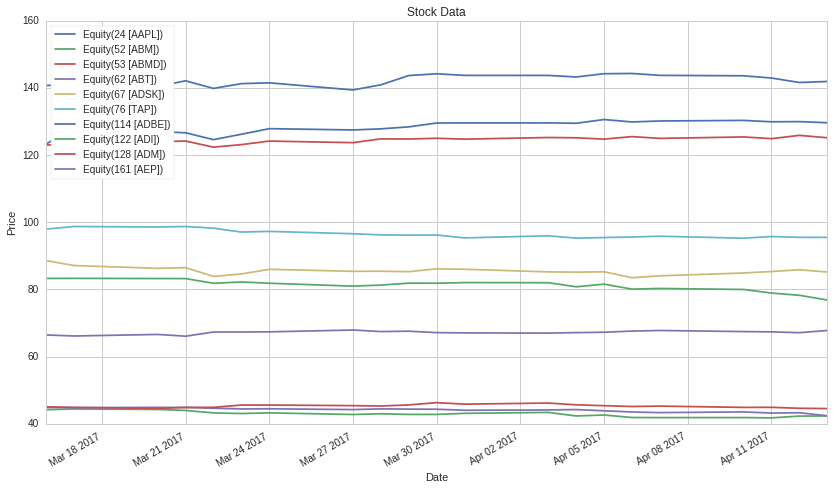

In [43]:
pricing = pricing.sort_index()
ax = pricing.ix[:,0:10].plot(title="Stock Data")
ax.set_xlabel("Date")
ax.set_ylabel("Price")
plt.show()

## Daily Returns

In [44]:
def compute_daily_returns(df):
    """Compute and return the daily return values."""
    # Note: Returned DataFrame must have the same number of rows
    daily_returns = (df / df.shift(1)) - 1 
    daily_returns.ix[0,:] = 0 
    return daily_returns

In [45]:
dayly_returns = compute_daily_returns(pricing)
dayly_returns = dayly_returns.sort_index()
dayly_returns.head()

,Equity(24 [AAPL]),Equity(52 [ABM]),Equity(53 [ABMD]),Equity(62 [ABT]),Equity(67 [ADSK]),Equity(76 [TAP]),Equity(114 [ADBE]),Equity(122 [ADI]),Equity(128 [ADM]),Equity(161 [AEP]),...,Equity(49760 [WBT]),Equity(49881 [LSXM_A]),Equity(49891 [MGP]),Equity(50138 [PI]),Equity(50181 [FHB]),Equity(50288 [TTD]),Equity(50357 [ARCH]),Equity(50533 [CNDT]),Equity(50535 [PK]),Equity(50595 [BIVV])
2017-03-16 00:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-03-17 00:00:00+00:00,0.001990,0.004952,0.001382,-0.001537,-0.016591,0.007859,0.042183,0.000240,-0.003550,-0.004664,...,-0.015385,0.001788,0.000000,0.007690,-0.003505,-0.042543,0.002780,-0.014330,-0.001110,-0.001777
2017-03-20 00:00:00+00:00,-0.004255,-0.003128,0.006495,0.001985,-0.009641,-0.001519,-0.011359,-0.000600,-0.006903,0.006953,...,0.014583,0.008926,0.016971,-0.000347,-0.002239,-0.031453,-0.022469,-0.004425,-0.000383,-0.031046
2017-03-21 00:00:00+00:00,0.012179,-0.006749,0.001694,-0.000891,0.002434,0.001521,-0.002756,-0.000120,0.007175,-0.007805,...,0.004620,-0.002275,-0.004548,0.004511,-0.010256,-0.028866,-0.013284,0.019619,0.002644,0.003265
2017-03-22 00:00:00+00:00,-0.015938,-0.016749,-0.014656,-0.004635,-0.030058,-0.005063,-0.016109,-0.016937,0.000000,0.018759,...,-0.019928,-0.037243,-0.006504,-0.014508,-0.039508,-0.011943,-0.014219,-0.010524,-0.018805,-0.004679


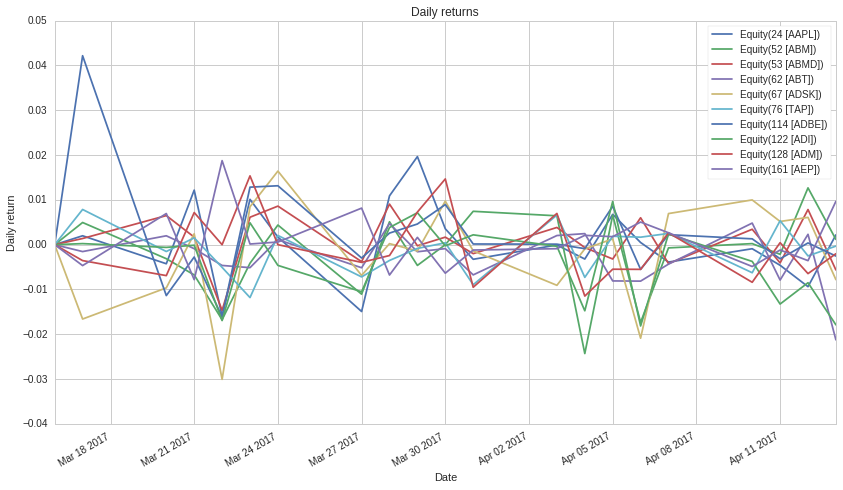

In [46]:
ax = dayly_returns.ix[:,0:10].plot(title="Daily returns")
ax.set_xlabel("Date")
ax.set_ylabel("Daily return")
plt.show()

__Top performance by day and related symbols__

In [47]:
dayly_returns.max(axis=1)

2017-03-16 00:00:00+00:00    0.000000
2017-03-17 00:00:00+00:00    0.095263
2017-03-20 00:00:00+00:00    0.507750
2017-03-21 00:00:00+00:00    0.396262
2017-03-22 00:00:00+00:00    0.069565
2017-03-23 00:00:00+00:00    0.118000
2017-03-24 00:00:00+00:00    0.127086
2017-03-27 00:00:00+00:00    0.141304
2017-03-28 00:00:00+00:00    0.219277
2017-03-29 00:00:00+00:00    0.182884
2017-03-30 00:00:00+00:00    0.120509
2017-03-31 00:00:00+00:00    0.169469
2017-04-03 00:00:00+00:00    0.073515
2017-04-04 00:00:00+00:00    0.137931
2017-04-05 00:00:00+00:00    0.125145
2017-04-06 00:00:00+00:00    0.100378
2017-04-07 00:00:00+00:00    0.080233
2017-04-10 00:00:00+00:00    0.308448
2017-04-11 00:00:00+00:00    0.148936
2017-04-12 00:00:00+00:00    0.276228
2017-04-13 00:00:00+00:00    0.185775
Freq: C, dtype: float64

In [48]:
dayly_returns.idxmax(axis=1)

2017-03-16 00:00:00+00:00       Equity(24 [AAPL])
2017-03-17 00:00:00+00:00     Equity(45199 [SFM])
2017-03-20 00:00:00+00:00    Equity(44989 [ESPR])
2017-03-21 00:00:00+00:00    Equity(44989 [ESPR])
2017-03-22 00:00:00+00:00      Equity(26203 [SA])
2017-03-23 00:00:00+00:00    Equity(44665 [INSY])
2017-03-24 00:00:00+00:00       Equity(5121 [MU])
2017-03-27 00:00:00+00:00    Equity(37849 [IPXL])
2017-03-28 00:00:00+00:00    Equity(46283 [CARA])
2017-03-29 00:00:00+00:00      Equity(43599 [RH])
2017-03-30 00:00:00+00:00      Equity(5645 [BRS])
2017-03-31 00:00:00+00:00      Equity(2893 [FMC])
2017-04-03 00:00:00+00:00     Equity(27886 [BAS])
2017-04-04 00:00:00+00:00    Equity(32871 [AFSI])
2017-04-05 00:00:00+00:00     Equity(7061 [SPLS])
2017-04-06 00:00:00+00:00     Equity(15575 [ALR])
2017-04-07 00:00:00+00:00    Equity(21366 [OCLR])
2017-04-10 00:00:00+00:00      Equity(270 [AKRX])
2017-04-11 00:00:00+00:00    Equity(27817 [SPWR])
2017-04-12 00:00:00+00:00    Equity(14972 [NBIX])


__average__ / __std__

In [49]:
dayly_returns.mean(axis=1)

2017-03-16 00:00:00+00:00    0.000000
2017-03-17 00:00:00+00:00   -0.001152
2017-03-20 00:00:00+00:00   -0.000700
2017-03-21 00:00:00+00:00    0.000608
2017-03-22 00:00:00+00:00   -0.024802
2017-03-23 00:00:00+00:00    0.002518
2017-03-24 00:00:00+00:00    0.005014
2017-03-27 00:00:00+00:00   -0.011697
2017-03-28 00:00:00+00:00    0.010335
2017-03-29 00:00:00+00:00    0.008512
2017-03-30 00:00:00+00:00    0.005982
2017-03-31 00:00:00+00:00    0.002250
2017-04-03 00:00:00+00:00    0.003427
2017-04-04 00:00:00+00:00   -0.009529
2017-04-05 00:00:00+00:00    0.004958
2017-04-06 00:00:00+00:00   -0.010608
2017-04-07 00:00:00+00:00    0.004577
2017-04-10 00:00:00+00:00    0.002569
2017-04-11 00:00:00+00:00    0.001067
2017-04-12 00:00:00+00:00    0.003817
2017-04-13 00:00:00+00:00   -0.009196
Freq: C, dtype: float64

In [50]:
dayly_returns.std(axis=1)

2017-03-16 00:00:00+00:00    0.000000
2017-03-17 00:00:00+00:00    0.017876
2017-03-20 00:00:00+00:00    0.021306
2017-03-21 00:00:00+00:00    0.017368
2017-03-22 00:00:00+00:00    0.022237
2017-03-23 00:00:00+00:00    0.014944
2017-03-24 00:00:00+00:00    0.014095
2017-03-27 00:00:00+00:00    0.017893
2017-03-28 00:00:00+00:00    0.018051
2017-03-29 00:00:00+00:00    0.016039
2017-03-30 00:00:00+00:00    0.016876
2017-03-31 00:00:00+00:00    0.014303
2017-04-03 00:00:00+00:00    0.013928
2017-04-04 00:00:00+00:00    0.017049
2017-04-05 00:00:00+00:00    0.015310
2017-04-06 00:00:00+00:00    0.016043
2017-04-07 00:00:00+00:00    0.011434
2017-04-10 00:00:00+00:00    0.017047
2017-04-11 00:00:00+00:00    0.014889
2017-04-12 00:00:00+00:00    0.014716
2017-04-13 00:00:00+00:00    0.015205
Freq: C, dtype: float64

## Cumulative returns

In [51]:
def cumulative_returns(df):
    return df/df.ix[0,:] - 1 

In [52]:
cr = cumulative_returns(pricing)
cr = cr.sort_index()
cr.head()

,Equity(24 [AAPL]),Equity(52 [ABM]),Equity(53 [ABMD]),Equity(62 [ABT]),Equity(67 [ADSK]),Equity(76 [TAP]),Equity(114 [ADBE]),Equity(122 [ADI]),Equity(128 [ADM]),Equity(161 [AEP]),...,Equity(49760 [WBT]),Equity(49881 [LSXM_A]),Equity(49891 [MGP]),Equity(50138 [PI]),Equity(50181 [FHB]),Equity(50288 [TTD]),Equity(50357 [ARCH]),Equity(50533 [CNDT]),Equity(50535 [PK]),Equity(50595 [BIVV])
2017-03-16 00:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-03-17 00:00:00+00:00,0.001990,0.004952,0.001382,-0.001537,-0.016591,0.007859,0.042183,0.000240,-0.003550,-0.004664,...,-0.015385,0.001788,0.000000,0.007690,-0.003505,-0.042543,0.002780,-0.014330,-0.001110,-0.001777
2017-03-20 00:00:00+00:00,-0.002274,0.001809,0.007886,0.000445,-0.026072,0.006328,0.030345,-0.000360,-0.010428,0.002257,...,-0.001026,0.010731,0.016971,0.007340,-0.005736,-0.072658,-0.019751,-0.018692,-0.001492,-0.032767
2017-03-21 00:00:00+00:00,0.009878,-0.004952,0.009593,-0.000445,-0.023702,0.007859,0.027505,-0.000480,-0.003328,-0.005566,...,0.003590,0.008431,0.012346,0.011884,-0.015934,-0.099426,-0.032772,0.000561,0.001148,-0.029609
2017-03-22 00:00:00+00:00,-0.006218,-0.021618,-0.005203,-0.005079,-0.053047,0.002756,0.010953,-0.017409,-0.003328,0.013089,...,-0.016410,-0.029126,0.005762,-0.002796,-0.054812,-0.110182,-0.046525,-0.009969,-0.017679,-0.034149


In [53]:
cr.max(axis=1)

2017-03-16 00:00:00+00:00    0.000000
2017-03-17 00:00:00+00:00    0.095263
2017-03-20 00:00:00+00:00    0.197704
2017-03-21 00:00:00+00:00    0.417457
2017-03-22 00:00:00+00:00    0.391901
2017-03-23 00:00:00+00:00    0.457908
2017-03-24 00:00:00+00:00    0.435587
2017-03-27 00:00:00+00:00    0.392219
2017-03-28 00:00:00+00:00    0.489158
2017-03-29 00:00:00+00:00    0.525510
2017-03-30 00:00:00+00:00    0.546556
2017-03-31 00:00:00+00:00    0.482143
2017-04-03 00:00:00+00:00    0.507653
2017-04-04 00:00:00+00:00    0.454082
2017-04-05 00:00:00+00:00    0.413265
2017-04-06 00:00:00+00:00    0.339286
2017-04-07 00:00:00+00:00    0.343915
2017-04-10 00:00:00+00:00    0.465024
2017-04-11 00:00:00+00:00    0.460882
2017-04-12 00:00:00+00:00    0.506849
2017-04-13 00:00:00+00:00    0.520982
Freq: C, dtype: float64

In [54]:
cr.idxmax(axis=1)

2017-03-16 00:00:00+00:00       Equity(24 [AAPL])
2017-03-17 00:00:00+00:00     Equity(45199 [SFM])
2017-03-20 00:00:00+00:00    Equity(24572 [NKTR])
2017-03-21 00:00:00+00:00    Equity(44989 [ESPR])
2017-03-22 00:00:00+00:00    Equity(24572 [NKTR])
2017-03-23 00:00:00+00:00    Equity(24572 [NKTR])
2017-03-24 00:00:00+00:00    Equity(24572 [NKTR])
2017-03-27 00:00:00+00:00    Equity(24572 [NKTR])
2017-03-28 00:00:00+00:00    Equity(24572 [NKTR])
2017-03-29 00:00:00+00:00    Equity(24572 [NKTR])
2017-03-30 00:00:00+00:00    Equity(24572 [NKTR])
2017-03-31 00:00:00+00:00    Equity(24572 [NKTR])
2017-04-03 00:00:00+00:00    Equity(24572 [NKTR])
2017-04-04 00:00:00+00:00    Equity(24572 [NKTR])
2017-04-05 00:00:00+00:00    Equity(24572 [NKTR])
2017-04-06 00:00:00+00:00    Equity(24572 [NKTR])
2017-04-07 00:00:00+00:00    Equity(37849 [IPXL])
2017-04-10 00:00:00+00:00      Equity(270 [AKRX])
2017-04-11 00:00:00+00:00    Equity(38633 [ASPS])
2017-04-12 00:00:00+00:00    Equity(26169 [SHLD])


Focusing on the last day only, we want to know the ranking. 

In [55]:
cr.ix[ (cr.shape[0]-1) ,:].sort_values(ascending=False)

Equity(38633 [ASPS])    0.520982
Equity(26169 [SHLD])    0.517123
Equity(270 [AKRX])      0.450506
Equity(37849 [IPXL])    0.396825
Equity(43599 [RH])      0.330968
Equity(20133 [PNRA])    0.327920
Equity(11361 [PENN])    0.228852
Equity(8045 [VRTX])     0.215300
Equity(45199 [SFM])     0.210526
Equity(2893 [FMC])      0.204243
Equity(44989 [ESPR])    0.200506
Equity(23602 [LCI])     0.193622
Equity(1374 [CDE])      0.193004
Equity(8158 [WFM])      0.188298
Equity(35036 [LL])      0.182802
Equity(32819 [GSAT])    0.180556
Equity(47833 [W])       0.180449
Equity(46191 [EPE])     0.172414
Equity(24572 [NKTR])    0.158801
Equity(43201 [FIVE])    0.154103
Equity(36735 [ILG])     0.145308
Equity(31341 [ZIOP])    0.145086
Equity(46283 [CARA])    0.143218
Equity(28016 [CMG])     0.139839
Equity(6455 [RGLD])     0.138295
Equity(26412 [CAB])     0.136383
Equity(39840 [TSLA])    0.130716
Equity(15575 [ALR])     0.130621
Equity(27443 [MPW])     0.128433
Equity(48823 [SEDG])    0.124555
          

__Best performance__

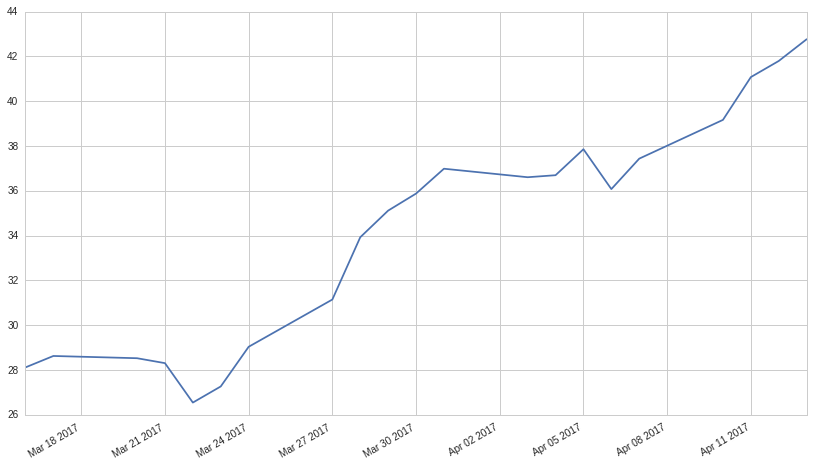

In [56]:
pricing[cr.idxmax(axis=1)[cr.idxmax(axis=1).shape[0]-1]].plot()

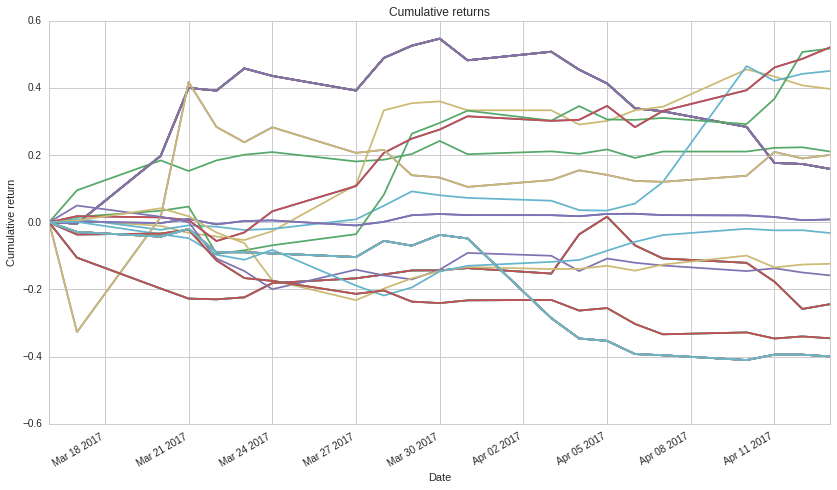

In [57]:
ax = cr[pd.concat([cr.idxmax(axis=1),cr.idxmin(axis=1)])].plot(title="Cumulative returns")
ax.set_xlabel("Date")
ax.set_ylabel("Cumulative return")
ax.legend_.remove()
plt.show()

## Sharpe Ratio

In [58]:
def sharpe_ratio(df,sample_freq='d',risk_free_rate=0.0):
    
    sr = (df - risk_free_rate).mean() / df.std()
    
    if sample_freq == 'd':
        sr = sr * np.sqrt(252)
    elif sample_freq == 'w':
        sr = sr * np.sqrt(52)
    elif sample_freq == 'm':
        sr = sr * np.sqrt(12)
    else:
        raise Exception('unkown sample frequency :'+str(sample_freq))
        
    sr = sr.replace(np.inf, np.nan)
        
    return sr

In [59]:
sr = sharpe_ratio(compute_daily_returns(pricing))
sr.fillna(0)
sr.head()

Equity(24 [AAPL])    0.809086
Equity(52 [ABM])    -3.452433
Equity(53 [ABMD])    2.330415
Equity(62 [ABT])    -7.235744
Equity(67 [ADSK])   -2.563469
dtype: float64

In [60]:
sr = sr.sort_values(ascending=False)
sr.head(20)

Equity(27443 [MPW])     12.940992
Equity(3488 [HCN])      12.887373
Equity(43032 [HTA])     12.738680
Equity(8965 [HR])       11.831820
Equity(45656 [GLPI])    11.669638
Equity(17702 [NLY])     11.026595
Equity(33026 [DCT])     10.758419
Equity(2293 [DRE])      10.390959
Equity(5621 [OHI])      10.342901
Equity(45113 [DOC])      9.814259
Equity(24760 [AMT])      9.574202
Equity(18821 [VTR])      9.570847
Equity(38633 [ASPS])     9.127276
Equity(20799 [SNH])      9.111372
Equity(38759 [ARI])      9.105244
Equity(19258 [CCI])      9.038993
Equity(38446 [GOV])      9.037653
Equity(6900 [SJI])       9.007821
Equity(49325 [CCP])      8.872264
Equity(20277 [RAI])      8.786980
dtype: float64

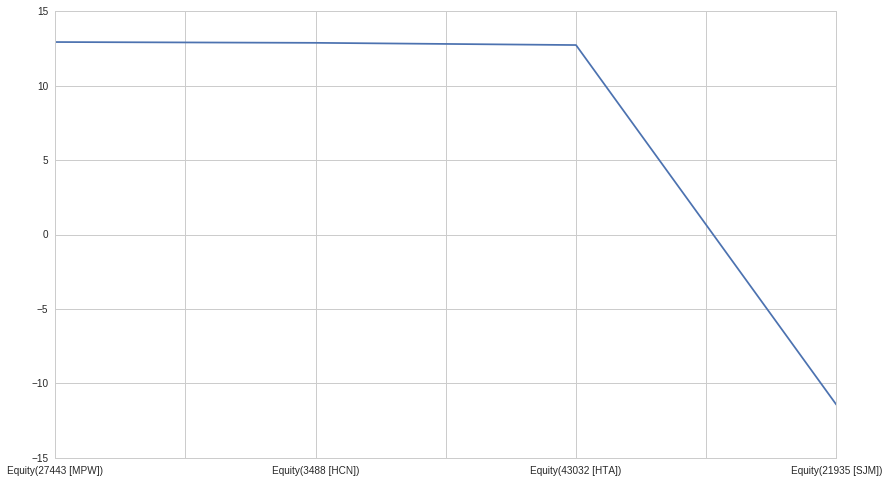

In [61]:
pd.concat([sr.head(3),sr.tail(1)]).plot()

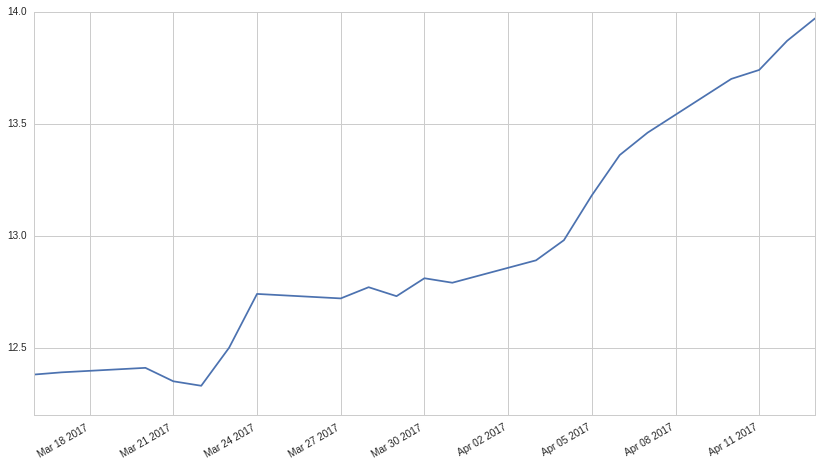

In [62]:
pricing[sr.index[0]].plot()

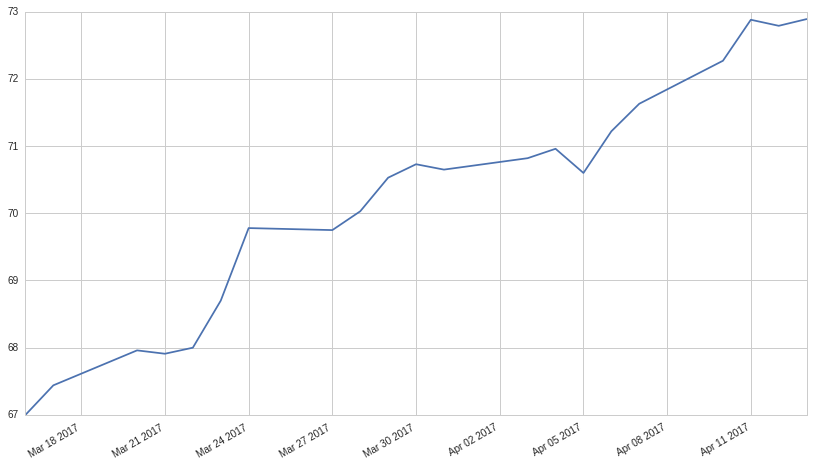

In [63]:
pricing[sr.index[1]].plot()

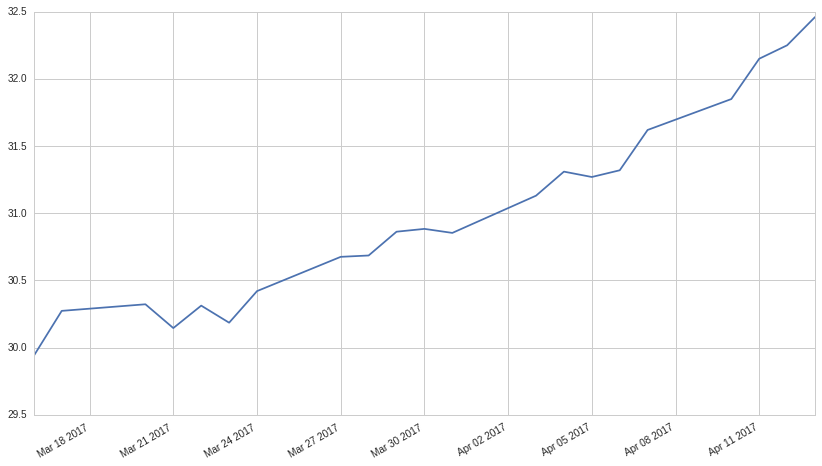

In [64]:
pricing[sr.index[2]].plot()

# 6 MONTHs - Let's see performace in the past 6 months 

In [65]:
DELTA = 30*6

In [66]:
start_date = (datetime.date.today() - datetime.timedelta(DELTA)).strftime("%m-%d-%Y")
print("start_date",start_date)

('start_date', '10-17-2016')


In [67]:
end_date = (datetime.date.today()).strftime("%m-%d-%Y")
print("end_date",end_date)

('end_date', '04-15-2017')


In [68]:
def make_pipeline():
    universe = (Q1500US())
    pipe = Pipeline( screen = universe)
    return pipe

result = run_pipeline(pipeline=make_pipeline(),start_date=start_date,end_date=end_date)
result.head()

Empty DataFrame
Columns: []
Index: [(2016-10-17 00:00:00+00:00, Equity(2 [ARNC])), (2016-10-17 00:00:00+00:00, Equity(24 [AAPL])), (2016-10-17 00:00:00+00:00, Equity(53 [ABMD])), (2016-10-17 00:00:00+00:00, Equity(62 [ABT])), (2016-10-17 00:00:00+00:00, Equity(67 [ADSK]))]

In [69]:
assets = result.index.levels[1].unique()
print("# assets:",len(assets))

('# assets:', 1599)


In [70]:
pricing = fill_missing_values(get_pricing(assets,start_date=start_date,end_date=end_date,fields='open_price'))

In [71]:
pricing.head()

,Equity(2 [ARNC]),Equity(24 [AAPL]),Equity(52 [ABM]),Equity(53 [ABMD]),Equity(62 [ABT]),Equity(67 [ADSK]),Equity(76 [TAP]),Equity(114 [ADBE]),Equity(122 [ADI]),Equity(128 [ADM]),...,Equity(49881 [LSXM_A]),Equity(49891 [MGP]),Equity(50138 [PI]),Equity(50181 [FHB]),Equity(50288 [TTD]),Equity(50357 [ARCH]),Equity(50499 [EVHC]),Equity(50533 [CNDT]),Equity(50535 [PK]),Equity(50595 [BIVV])
2016-10-17 00:00:00+00:00,26.233,116.227,37.472,127.00,40.222,69.33,110.587,108.00,60.969,41.526,...,32.49,24.567,27.26,26.100,27.02,67.14,70.36,14.6,26.147,44.42
2016-10-18 00:00:00+00:00,26.362,117.069,37.889,128.97,40.341,69.92,110.190,108.44,61.642,41.634,...,33.01,24.838,27.93,26.110,26.27,70.25,70.36,14.6,26.147,44.42
2016-10-19 00:00:00+00:00,26.243,116.148,37.799,129.50,40.015,70.13,109.099,108.81,61.157,41.359,...,33.09,25.178,27.79,26.356,25.75,70.10,70.36,14.6,26.147,44.42
2016-10-20 00:00:00+00:00,26.759,115.761,37.522,126.50,39.511,70.75,108.782,108.41,61.593,41.516,...,33.37,25.158,28.12,26.455,25.10,70.98,70.36,14.6,26.147,44.42
2016-10-21 00:00:00+00:00,26.362,115.712,37.442,124.91,39.906,70.85,107.512,108.51,62.433,41.319,...,33.27,25.207,27.17,26.327,26.51,71.63,70.36,14.6,26.147,44.42


In [72]:
type(pricing)

<class 'pandas.core.frame.DataFrame'>

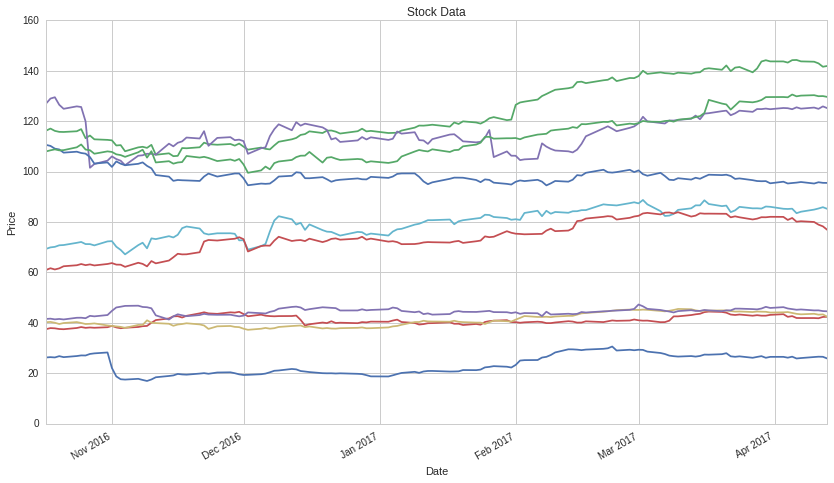

In [73]:
pricing = pricing.sort_index()
ax = pricing.ix[:,0:10].plot(title="Stock Data")
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend_.remove()
plt.show()

## Daily Returns

In [74]:
def compute_daily_returns(df):
    """Compute and return the daily return values."""
    # Note: Returned DataFrame must have the same number of rows
    daily_returns = (df / df.shift(1)) - 1 
    daily_returns.ix[0,:] = 0 
    return daily_returns

In [75]:
dayly_returns = compute_daily_returns(pricing)
dayly_returns = dayly_returns.sort_index()
dayly_returns.head()

,Equity(2 [ARNC]),Equity(24 [AAPL]),Equity(52 [ABM]),Equity(53 [ABMD]),Equity(62 [ABT]),Equity(67 [ADSK]),Equity(76 [TAP]),Equity(114 [ADBE]),Equity(122 [ADI]),Equity(128 [ADM]),...,Equity(49881 [LSXM_A]),Equity(49891 [MGP]),Equity(50138 [PI]),Equity(50181 [FHB]),Equity(50288 [TTD]),Equity(50357 [ARCH]),Equity(50499 [EVHC]),Equity(50533 [CNDT]),Equity(50535 [PK]),Equity(50595 [BIVV])
2016-10-17 00:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2016-10-18 00:00:00+00:00,0.004917,0.007244,0.011128,0.015512,0.002959,0.008510,-0.003590,0.004074,0.011038,0.002601,...,0.016005,0.011031,0.024578,0.000383,-0.027757,0.046321,0.0,0.0,0.0,0.0
2016-10-19 00:00:00+00:00,-0.004514,-0.007867,-0.002375,0.004109,-0.008081,0.003003,-0.009901,0.003412,-0.007868,-0.006605,...,0.002424,0.013689,-0.005013,0.009422,-0.019794,-0.002135,0.0,0.0,0.0,0.0
2016-10-20 00:00:00+00:00,0.019662,-0.003332,-0.007328,-0.023166,-0.012595,0.008841,-0.002906,-0.003676,0.007129,0.003796,...,0.008462,-0.000794,0.011875,0.003756,-0.025243,0.012553,0.0,0.0,0.0,0.0
2016-10-21 00:00:00+00:00,-0.014836,-0.000423,-0.002132,-0.012569,0.009997,0.001413,-0.011675,0.000922,0.013638,-0.004745,...,-0.002997,0.001948,-0.033784,-0.004838,0.056175,0.009158,0.0,0.0,0.0,0.0


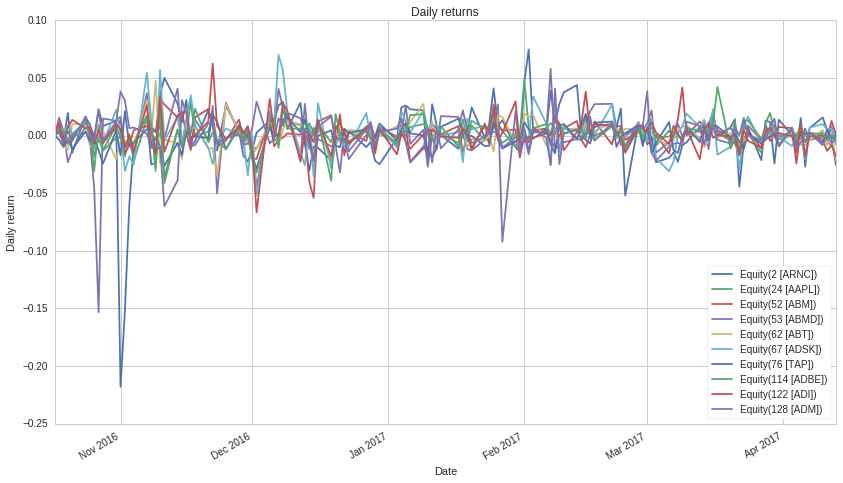

In [76]:
ax = dayly_returns.ix[:,0:10].plot(title="Daily returns")
ax.set_xlabel("Date")
ax.set_ylabel("Daily return")
plt.show()

__Top performance by day and related symbols__

In [77]:
dayly_returns.max(axis=1)

2016-10-17 00:00:00+00:00    0.000000
2016-10-18 00:00:00+00:00    0.160498
2016-10-19 00:00:00+00:00    0.422330
2016-10-20 00:00:00+00:00    0.081429
2016-10-21 00:00:00+00:00    0.325738
2016-10-24 00:00:00+00:00    0.164930
2016-10-25 00:00:00+00:00    0.095113
2016-10-26 00:00:00+00:00    0.529412
2016-10-27 00:00:00+00:00    0.121847
2016-10-28 00:00:00+00:00    0.123779
2016-10-31 00:00:00+00:00    0.161808
2016-11-01 00:00:00+00:00    0.223275
2016-11-02 00:00:00+00:00    0.267908
2016-11-03 00:00:00+00:00    0.416016
2016-11-04 00:00:00+00:00    0.136585
2016-11-07 00:00:00+00:00    0.244815
2016-11-08 00:00:00+00:00    0.164818
2016-11-09 00:00:00+00:00    0.368792
2016-11-10 00:00:00+00:00    0.277487
2016-11-11 00:00:00+00:00    0.145283
2016-11-14 00:00:00+00:00    0.271504
2016-11-15 00:00:00+00:00    0.134627
2016-11-16 00:00:00+00:00    0.143034
2016-11-17 00:00:00+00:00    0.252873
2016-11-18 00:00:00+00:00    0.175163
2016-11-21 00:00:00+00:00    0.169886
2016-11-22 0

In [78]:
dayly_returns.idxmax(axis=1)

2016-10-17 00:00:00+00:00        Equity(2 [ARNC])
2016-10-18 00:00:00+00:00    Equity(23709 [NFLX])
2016-10-19 00:00:00+00:00    Equity(40028 [MMYT])
2016-10-20 00:00:00+00:00       Equity(679 [AXP])
2016-10-21 00:00:00+00:00      Equity(301 [ALKS])
2016-10-24 00:00:00+00:00      Equity(799 [BEAV])
2016-10-25 00:00:00+00:00    Equity(38538 [MDSO])
2016-10-26 00:00:00+00:00     Equity(27886 [BAS])
2016-10-27 00:00:00+00:00    Equity(49322 [PLNT])
2016-10-28 00:00:00+00:00    Equity(18587 [LVLT])
2016-10-31 00:00:00+00:00    Equity(42165 [INVN])
2016-11-01 00:00:00+00:00    Equity(20061 [BRCD])
2016-11-02 00:00:00+00:00    Equity(46354 [EGRX])
2016-11-03 00:00:00+00:00    Equity(23176 [ABCO])
2016-11-04 00:00:00+00:00    Equity(45503 [AAOI])
2016-11-07 00:00:00+00:00     Equity(4031 [IONS])
2016-11-08 00:00:00+00:00    Equity(33949 [FOLD])
2016-11-09 00:00:00+00:00     Equity(22102 [CXW])
2016-11-10 00:00:00+00:00     Equity(19336 [WFT])
2016-11-11 00:00:00+00:00    Equity(14284 [SCCO])


__average__ / __std__

In [79]:
dayly_returns.mean(axis=1)

2016-10-17 00:00:00+00:00    0.000000
2016-10-18 00:00:00+00:00    0.007686
2016-10-19 00:00:00+00:00   -0.001649
2016-10-20 00:00:00+00:00    0.000036
2016-10-21 00:00:00+00:00   -0.004694
2016-10-24 00:00:00+00:00    0.011301
2016-10-25 00:00:00+00:00   -0.004923
2016-10-26 00:00:00+00:00   -0.010215
2016-10-27 00:00:00+00:00    0.001887
2016-10-28 00:00:00+00:00   -0.013260
2016-10-31 00:00:00+00:00    0.001194
2016-11-01 00:00:00+00:00    0.002190
2016-11-02 00:00:00+00:00   -0.014724
2016-11-03 00:00:00+00:00   -0.005323
2016-11-04 00:00:00+00:00   -0.008331
2016-11-07 00:00:00+00:00    0.020871
2016-11-08 00:00:00+00:00    0.002327
2016-11-09 00:00:00+00:00   -0.000591
2016-11-10 00:00:00+00:00    0.037424
2016-11-11 00:00:00+00:00   -0.002606
2016-11-14 00:00:00+00:00    0.015671
2016-11-15 00:00:00+00:00    0.009014
2016-11-16 00:00:00+00:00    0.001963
2016-11-17 00:00:00+00:00    0.003328
2016-11-18 00:00:00+00:00    0.004042
2016-11-21 00:00:00+00:00    0.004174
2016-11-22 0

In [80]:
dayly_returns.std(axis=1)

2016-10-17 00:00:00+00:00    0.000000
2016-10-18 00:00:00+00:00    0.014980
2016-10-19 00:00:00+00:00    0.019913
2016-10-20 00:00:00+00:00    0.017034
2016-10-21 00:00:00+00:00    0.020724
2016-10-24 00:00:00+00:00    0.020893
2016-10-25 00:00:00+00:00    0.019288
2016-10-26 00:00:00+00:00    0.025025
2016-10-27 00:00:00+00:00    0.026669
2016-10-28 00:00:00+00:00    0.026064
2016-10-31 00:00:00+00:00    0.020735
2016-11-01 00:00:00+00:00    0.021651
2016-11-02 00:00:00+00:00    0.032231
2016-11-03 00:00:00+00:00    0.031801
2016-11-04 00:00:00+00:00    0.032698
2016-11-07 00:00:00+00:00    0.028589
2016-11-08 00:00:00+00:00    0.026841
2016-11-09 00:00:00+00:00    0.037765
2016-11-10 00:00:00+00:00    0.039196
2016-11-11 00:00:00+00:00    0.029679
2016-11-14 00:00:00+00:00    0.026969
2016-11-15 00:00:00+00:00    0.026832
2016-11-16 00:00:00+00:00    0.021099
2016-11-17 00:00:00+00:00    0.021690
2016-11-18 00:00:00+00:00    0.019365
2016-11-21 00:00:00+00:00    0.019678
2016-11-22 0

## Cumulative returns

In [81]:
def cumulative_returns(df):
    return df/df.ix[0,:] - 1 

In [82]:
cr = cumulative_returns(pricing)
cr = cr.sort_index()
cr.head()

,Equity(2 [ARNC]),Equity(24 [AAPL]),Equity(52 [ABM]),Equity(53 [ABMD]),Equity(62 [ABT]),Equity(67 [ADSK]),Equity(76 [TAP]),Equity(114 [ADBE]),Equity(122 [ADI]),Equity(128 [ADM]),...,Equity(49881 [LSXM_A]),Equity(49891 [MGP]),Equity(50138 [PI]),Equity(50181 [FHB]),Equity(50288 [TTD]),Equity(50357 [ARCH]),Equity(50499 [EVHC]),Equity(50533 [CNDT]),Equity(50535 [PK]),Equity(50595 [BIVV])
2016-10-17 00:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2016-10-18 00:00:00+00:00,0.004917,0.007244,0.011128,0.015512,0.002959,0.008510,-0.003590,0.004074,0.011038,0.002601,...,0.016005,0.011031,0.024578,0.000383,-0.027757,0.046321,0.0,0.0,0.0,0.0
2016-10-19 00:00:00+00:00,0.000381,-0.000680,0.008727,0.019685,-0.005146,0.011539,-0.013455,0.007500,0.003084,-0.004022,...,0.018467,0.024871,0.019442,0.009808,-0.047002,0.044087,0.0,0.0,0.0,0.0
2016-10-20 00:00:00+00:00,0.020051,-0.004009,0.001334,-0.003937,-0.017677,0.020482,-0.016322,0.003796,0.010235,-0.000241,...,0.027085,0.024057,0.031548,0.013602,-0.071058,0.057194,0.0,0.0,0.0,0.0
2016-10-21 00:00:00+00:00,0.004917,-0.004431,-0.000801,-0.016457,-0.007856,0.021924,-0.027806,0.004722,0.024012,-0.004985,...,0.024007,0.026051,-0.003302,0.008697,-0.018875,0.066875,0.0,0.0,0.0,0.0


In [83]:
cr.max(axis=1)

2016-10-17 00:00:00+00:00    0.000000
2016-10-18 00:00:00+00:00    0.160498
2016-10-19 00:00:00+00:00    0.391924
2016-10-20 00:00:00+00:00    0.332542
2016-10-21 00:00:00+00:00    0.344811
2016-10-24 00:00:00+00:00    0.372922
2016-10-25 00:00:00+00:00    0.346793
2016-10-26 00:00:00+00:00    0.349169
2016-10-27 00:00:00+00:00    0.358670
2016-10-28 00:00:00+00:00    0.363420
2016-10-31 00:00:00+00:00    0.377672
2016-11-01 00:00:00+00:00    0.339667
2016-11-02 00:00:00+00:00    0.391414
2016-11-03 00:00:00+00:00    0.399334
2016-11-04 00:00:00+00:00    0.405073
2016-11-07 00:00:00+00:00    0.401630
2016-11-08 00:00:00+00:00    0.407254
2016-11-09 00:00:00+00:00    0.485588
2016-11-10 00:00:00+00:00    0.583149
2016-11-11 00:00:00+00:00    0.618625
2016-11-14 00:00:00+00:00    0.753880
2016-11-15 00:00:00+00:00    0.787140
2016-11-16 00:00:00+00:00    0.758315
2016-11-17 00:00:00+00:00    0.764967
2016-11-18 00:00:00+00:00    0.762749
2016-11-21 00:00:00+00:00    0.809313
2016-11-22 0

In [84]:
cr.idxmax(axis=1)

2016-10-17 00:00:00+00:00        Equity(2 [ARNC])
2016-10-18 00:00:00+00:00    Equity(23709 [NFLX])
2016-10-19 00:00:00+00:00    Equity(40028 [MMYT])
2016-10-20 00:00:00+00:00    Equity(40028 [MMYT])
2016-10-21 00:00:00+00:00      Equity(301 [ALKS])
2016-10-24 00:00:00+00:00    Equity(40028 [MMYT])
2016-10-25 00:00:00+00:00    Equity(40028 [MMYT])
2016-10-26 00:00:00+00:00    Equity(40028 [MMYT])
2016-10-27 00:00:00+00:00    Equity(40028 [MMYT])
2016-10-28 00:00:00+00:00    Equity(40028 [MMYT])
2016-10-31 00:00:00+00:00    Equity(40028 [MMYT])
2016-11-01 00:00:00+00:00    Equity(40028 [MMYT])
2016-11-02 00:00:00+00:00    Equity(20061 [BRCD])
2016-11-03 00:00:00+00:00    Equity(20061 [BRCD])
2016-11-04 00:00:00+00:00    Equity(20061 [BRCD])
2016-11-07 00:00:00+00:00    Equity(20061 [BRCD])
2016-11-08 00:00:00+00:00    Equity(20061 [BRCD])
2016-11-09 00:00:00+00:00     Equity(10897 [AKS])
2016-11-10 00:00:00+00:00     Equity(10897 [AKS])
2016-11-11 00:00:00+00:00     Equity(10897 [AKS])


Focusing on the last day only, we want to know the ranking. 

In [85]:
cr.ix[ (cr.shape[0]-1) ,:].sort_values(ascending=False)

Equity(46528 [AKAO])      3.226069
Equity(44989 [ESPR])      2.144988
Equity(3891 [IMMU])       1.554585
Equity(45503 [AAOI])      1.461728
Equity(49210 [CC])        1.408331
Equity(22102 [CXW])       1.390989
Equity(46283 [CARA])      1.332046
Equity(11880 [ARIA])      1.149910
Equity(11710 [GEO])       1.113618
Equity(40353 [SODA])      1.049428
Equity(40530 [TROX])      1.044512
Equity(1751 [COHR])       0.864415
Equity(8329 [X])          0.846628
Equity(21383 [EXEL])      0.832447
Equity(45531 [PAH])       0.813986
Equity(351 [AMD])         0.807081
Equity(6104 [FIZZ])       0.803275
Equity(44770 [PTLA])      0.778582
Equity(40028 [MMYT])      0.760095
Equity(47332 [SAGE])      0.758199
Equity(42165 [INVN])      0.746518
Equity(37686 [LOPE])      0.713333
Equity(42166 [CLVS])      0.711686
Equity(45800 [WIX])       0.705543
Equity(2989 [FRED])       0.698327
Equity(26143 [NRG])       0.692544
Equity(22637 [SGMS])      0.691700
Equity(6000 [PIR])        0.671819
Equity(47430 [MBLY])

__Best performance__

In [86]:
cr.idxmax(axis=1)[cr.idxmax(axis=1).shape[0]-1]

Equity(46528, symbol=u'AKAO', asset_name=u'ACHAOGEN INC', exchange=u'NASDAQ', start_date=Timestamp('2014-03-11 00:00:00+0000', tz='UTC'), end_date=Timestamp('2017-04-17 00:00:00+0000', tz='UTC'), first_traded=None, auto_close_date=Timestamp('2017-04-20 00:00:00+0000', tz='UTC'), exchange_full=u'NASDAQ GLOBAL MARKET')

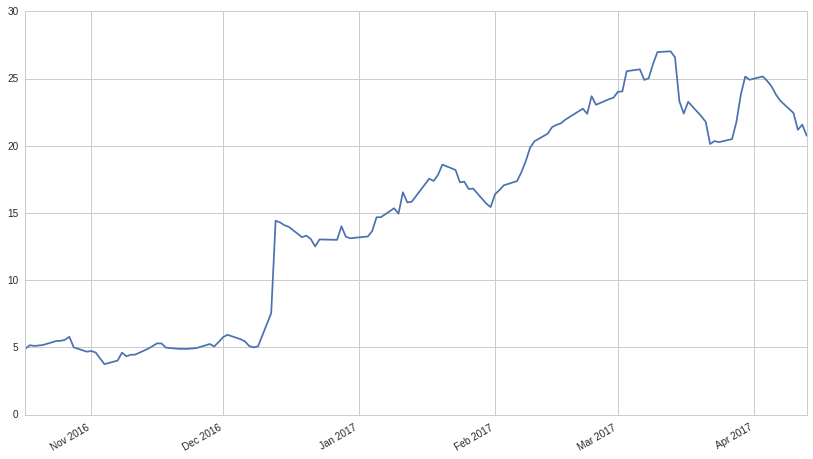

In [87]:
pricing[cr.idxmax(axis=1)[cr.idxmax(axis=1).shape[0]-1]].plot()

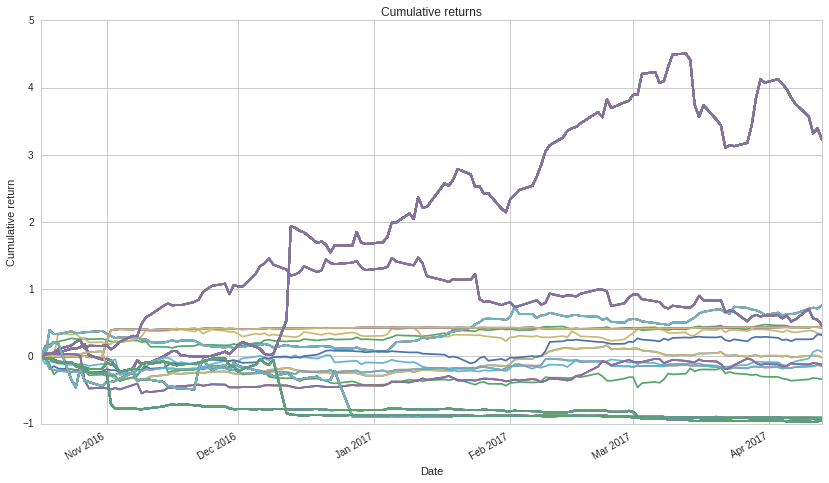

In [88]:
ax = cr[pd.concat([cr.idxmax(axis=1),cr.idxmin(axis=1)])].plot(title="Cumulative returns")
ax.set_xlabel("Date")
ax.set_ylabel("Cumulative return")
ax.legend_.remove()
plt.show()

## Sharpe Ratio

In [89]:
def sharpe_ratio(df,sample_freq='d',risk_free_rate=0.0):
    
    sr = (df - risk_free_rate).mean() / df.std()
    
    if sample_freq == 'd':
        sr = sr * np.sqrt(252)
    elif sample_freq == 'w':
        sr = sr * np.sqrt(52)
    elif sample_freq == 'm':
        sr = sr * np.sqrt(12)
    else:
        raise Exception('unkown sample frequency :'+str(sample_freq))
        
    sr = sr.replace(np.inf, np.nan)
        
    return sr

In [90]:
sr = sharpe_ratio(compute_daily_returns(pricing))
sr.fillna(0)
sr.head()

Equity(2 [ARNC])     0.206692
Equity(24 [AAPL])    2.618389
Equity(52 [ABM])     1.325719
Equity(53 [ABMD])    0.107921
Equity(62 [ABT])     0.695852
dtype: float64

In [91]:
sr = sr.sort_values(ascending=False)
sr.head(20)

Equity(19147 [RSG])     4.680318
Equity(34501 [MASI])    4.261553
Equity(35081 [CIM])     4.150231
Equity(25920 [MAR])     3.984777
Equity(2190 [DIS])      3.881432
Equity(42125 [VAC])     3.819748
Equity(49210 [CC])      3.811677
Equity(6104 [FIZZ])     3.799613
Equity(11710 [GEO])     3.785909
Equity(20133 [PNRA])    3.692840
Equity(22185 [XXIA])    3.692816
Equity(45531 [PAH])     3.635415
Equity(40353 [SODA])    3.625756
Equity(40030 [RP])      3.566585
Equity(24865 [CHH])     3.530807
Equity(698 [BA])        3.520981
Equity(1751 [COHR])     3.519929
Equity(15101 [CHKP])    3.518282
Equity(44647 [NRZ])     3.492094
Equity(4485 [LLTC])     3.472548
dtype: float64

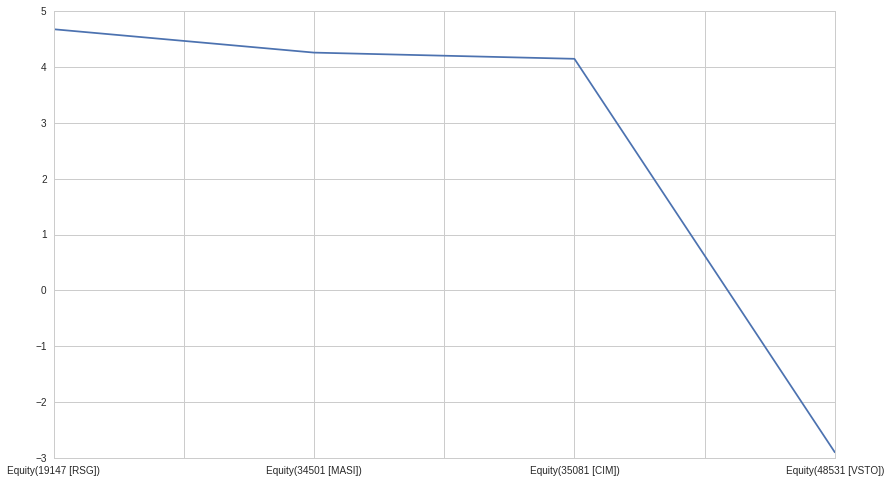

In [92]:
pd.concat([sr.head(3),sr.tail(1)]).plot()

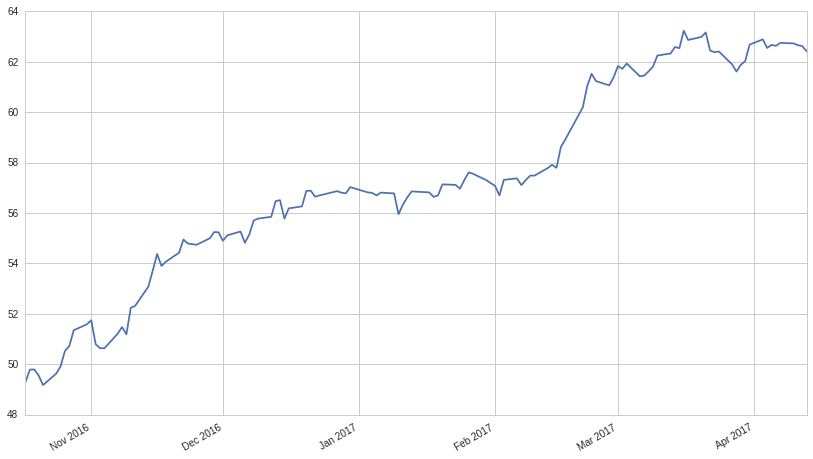

In [93]:
pricing[sr.index[0]].plot()

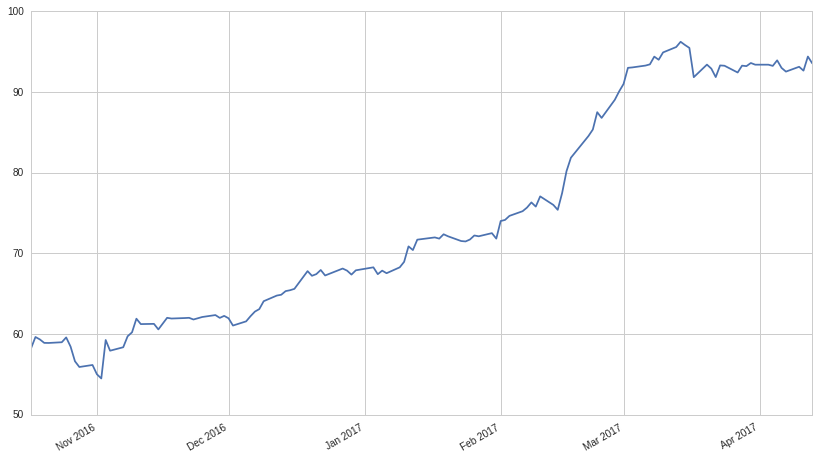

In [94]:
pricing[sr.index[1]].plot()

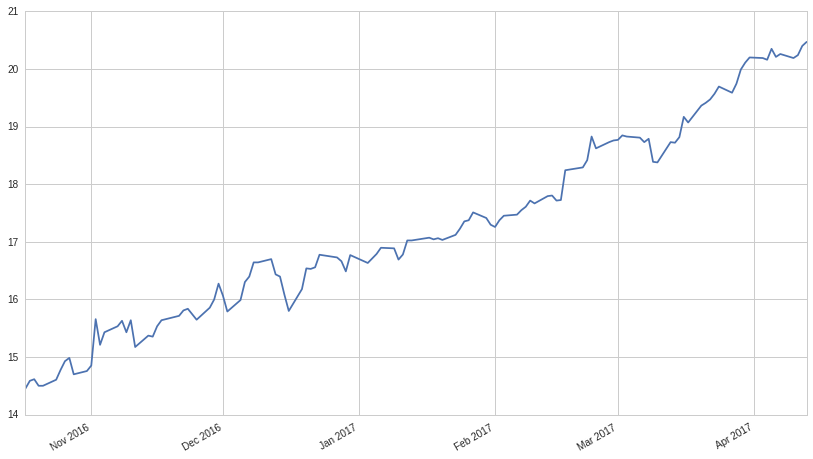

In [95]:
pricing[sr.index[2]].plot()